In [1]:
import os
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf

2024-04-24 20:29:22.633188: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 20:29:22.636164: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 20:29:22.674270: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 20:29:23.656173: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.16.1
Eager execution: True


In [5]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)
print("Local copy of the dataset file: {}".format(train_dataset_fp))

2194/2194 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Local copy of the dataset file: /home/codespace/.keras/datasets/iris_training.csv


In [6]:
import pandas as pd


In [7]:
train_df = pd.read_csv(train_dataset_fp)

In [8]:
train_df

,120,4,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


In [10]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [11]:
batch_size = 32
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)


In [12]:
features, labels = next(iter(train_dataset))
print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.6, 4.8, 4.9, 5.1, 5. , 7.6, 6.3, 6.7, 6.9, 5. , 5.5, 6.3, 5.1,
       6.9, 6. , 5.1, 6.1, 5. , 6.7, 4.5, 5. , 6.4, 6.5, 7.2, 6.5, 6.5,
       6. , 5.1, 6.1, 7. , 5.3, 5.8], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.5, 3. , 3.1, 3.8, 3. , 3. , 2.7, 3. , 3.1, 3.2, 3.5, 3.3, 3.8,
       3.2, 2.9, 3.5, 2.8, 3.5, 3. , 2.3, 3.4, 2.8, 3. , 3. , 3. , 2.8,
       3. , 3.7, 2.8, 3.2, 3.7, 2.8], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.9, 1.4, 1.5, 1.9, 1.6, 6.6, 4.9, 5. , 4.9, 1.2, 1.3, 4.7, 1.5,
       5.7, 4.5, 1.4, 4.7, 1.6, 5.2, 1.3, 1.5, 5.6, 5.8, 5.8, 5.5, 4.6,
       4.8, 1.5, 4. , 4.7, 1.5, 5.1], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.1, 0.1, 0.1, 0.4, 0.2, 2.1, 1.8, 1.7, 1.5, 0.2, 0.2, 1.6, 0.3,
       2.3, 1.5, 0.3, 1.2, 0.6, 2.3, 0.3, 0.2, 2.2, 2.2, 1.6,

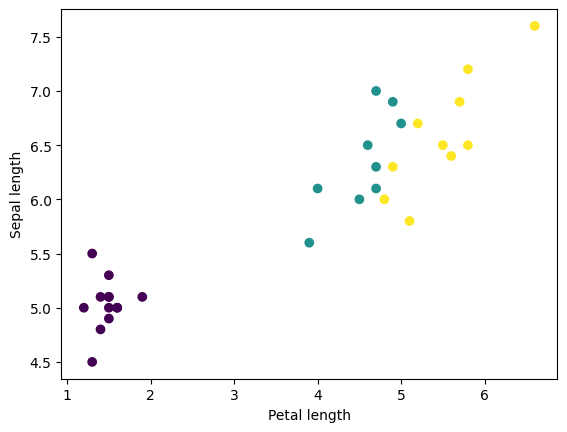

In [13]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')
plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()


In [14]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels


In [15]:
train_dataset = train_dataset.map(pack_features_vector)

In [16]:
features, labels = next(iter(train_dataset))
print(features[:5])


tf.Tensor(
[[6.8 3.2 5.9 2.3]
 [6.1 2.9 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [4.8 3.  1.4 0.1]
 [5.8 2.6 4.  1.2]], shape=(5, 4), dtype=float32)


In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3)
])

In [28]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [29]:
def loss(model, x, y, training):
    y_ = model(x, training=training)

    return loss_object(y_true=y, y_pred=y_)
l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.6325225830078125


In [30]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)


In [31]:
model.trainable_variables


[<KerasVariable shape=(4, 10), dtype=float32, path=sequential_2/dense_6/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_2/dense_6/bias>,
 <KerasVariable shape=(10, 10), dtype=float32, path=sequential_2/dense_7/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_2/dense_7/bias>,
 <KerasVariable shape=(10, 3), dtype=float32, path=sequential_2/dense_8/kernel>,
 <KerasVariable shape=(3,), dtype=float32, path=sequential_2/dense_8/bias>]

In [32]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [33]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                            loss_value.numpy()))
optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                            loss(model, features, labels, training=True).numpy()))


Step: 0, Initial Loss: 1.9562690258026123
Step: 1,         Loss: 1.6342283487319946


In [34]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201
for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        epoch_loss_avg.update_state(loss_value)
        epoch_accuracy.update_state(y, model(x, training=True))

    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))
        

Epoch 000: Loss: 1.500, Accuracy: 45.000%


2024-04-24 20:47:59.686404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:47:59.777674: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:47:59.884955: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:47:59.968788: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:00.046458: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:00.123877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:00.206786: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 050: Loss: 0.423, Accuracy: 83.333%


2024-04-24 20:48:03.893803: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:03.972557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:04.052663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:04.145400: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:04.232875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:04.314404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:04.394157: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 100: Loss: 0.349, Accuracy: 88.333%


2024-04-24 20:48:08.070983: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:08.150844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:08.230775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:08.313677: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:08.414828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:08.557045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:08.635983: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 150: Loss: 0.268, Accuracy: 91.667%


2024-04-24 20:48:12.236776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:12.325940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:12.411123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:12.495118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:12.574933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:12.655777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:12.806157: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 200: Loss: 0.224, Accuracy: 93.333%


2024-04-24 20:48:16.290469: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-24 20:48:16.370159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


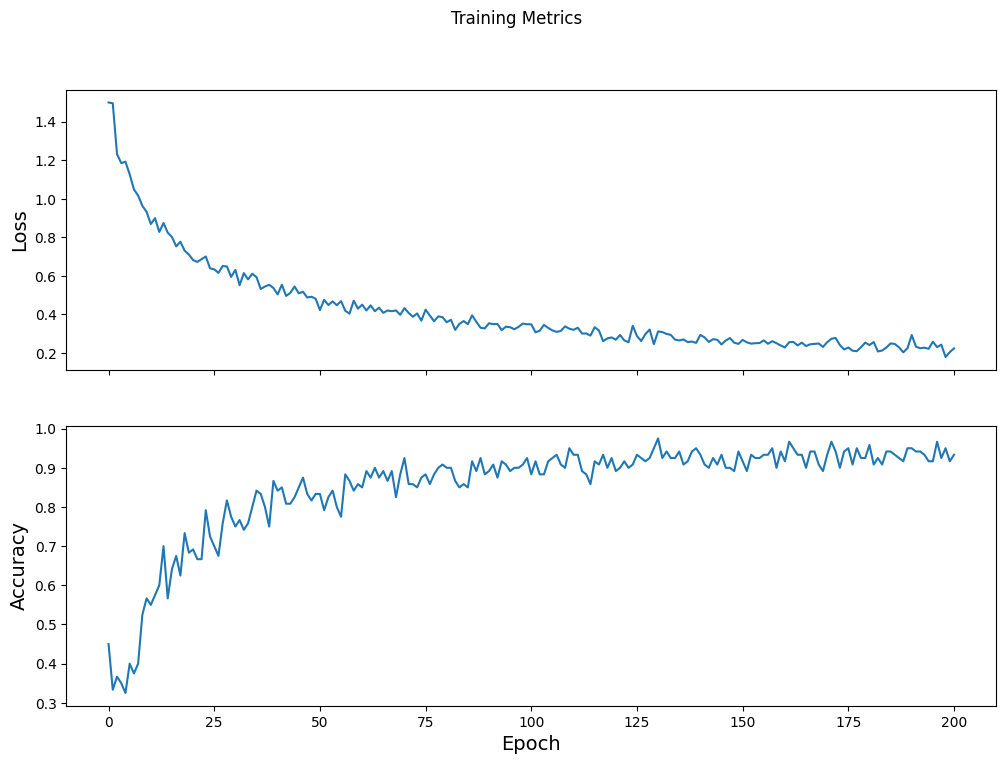

In [35]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()